In [1]:
import numpy as np
import h5py
from scipy import io
import matplotlib.pyplot as plt
from cfr import task
import importlib
sem_file = '/Users/morton/PycharmProjects/cmr_cfr/data/cfr_wikiw2v_raw.mat'
h5_file = '/Users/morton/PycharmProjects/cmr_cfr/data/cfr_patterns.hdf5'

## Write wiki2vec patterns

Read from MAT-file and normalize so that the dot product of each pair of patterns is equal to their correlation. Then write out patterns and pairwise similarity to a standard format HDF5 file.

In [2]:
task.write_patterns_w2v(sem_file, h5_file)

### Individual region patterns

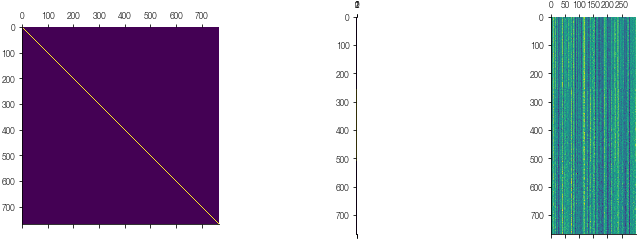

In [16]:
pat = {}
with h5py.File(h5_file, 'r') as f:
    for name in regions:
        pat[name] = f['pattern/' + name][()]

fig, ax = plt.subplots(1, 3, figsize=(12, 4));
ax[0].matshow(pat['loc']);
ax[1].matshow(pat['cat']);
ax[2].matshow(pat['w2v']);

### Individual region similarity

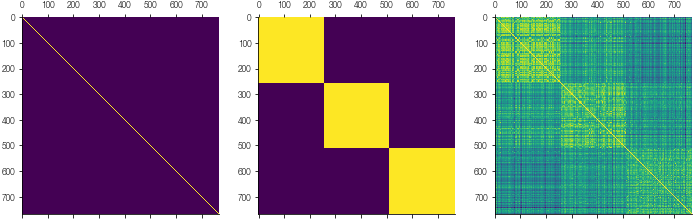

In [17]:
sim = {}
with h5py.File(h5_file, 'r') as f:
    for name in regions:
        sim[name] = f['similarity/' + name][()]

fig, ax = plt.subplots(1, 3, figsize=(12, 4));
ax[0].matshow(sim['loc']);
ax[1].matshow(sim['cat']);
ax[2].matshow(sim['w2v']);

### Full patterns with all weights=1

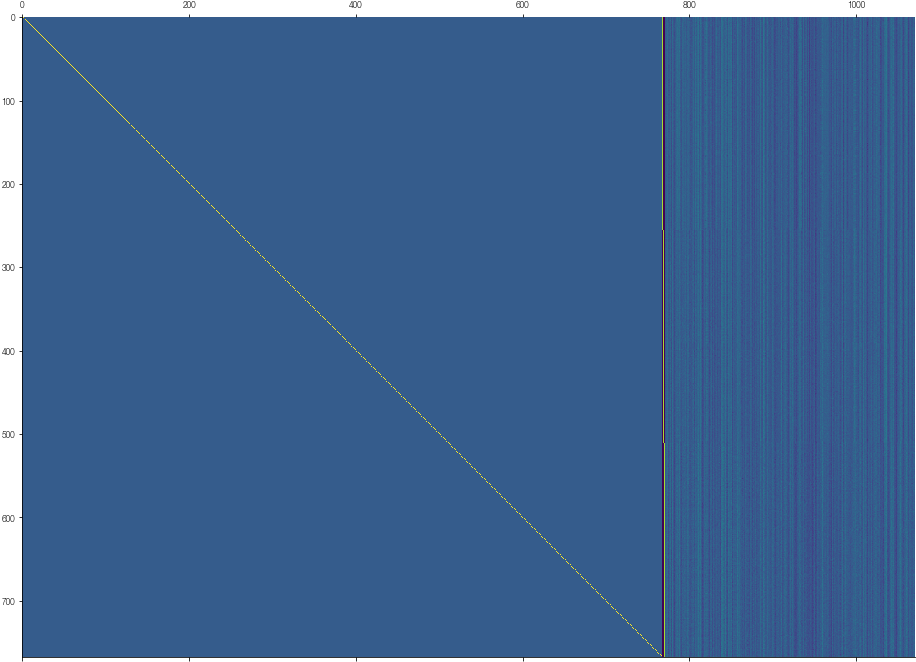

In [15]:
x_list = []
regions = ['loc', 'cat', 'w2v']
with h5py.File(h5_file, 'r') as f:
    for name in regions:
        x_list.append(f['pattern/' + name][()])
x = np.hstack(x_list)
fig, ax = plt.subplots(figsize=(16, 12))
ax.matshow(x);